In [6]:
import pandas as pd

df = pd.read_csv("data/gentrified_data_2011-2023.csv")

df.head()

,zip_code,msa_name,income,gentrified,year
0,64401,"St. Joseph, MO-KS MSA",67794.0,True,2012
1,64421,"St. Joseph, MO-KS MSA",40921.0,True,2012
2,64422,"St. Joseph, MO-KS MSA",32750.0,True,2012
3,64427,"St. Joseph, MO-KS MSA",53650.0,True,2012
4,64430,"St. Joseph, MO-KS MSA",46927.0,False,2012


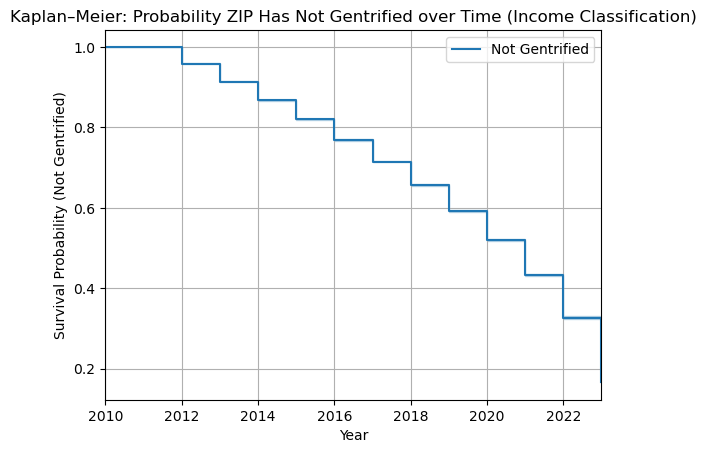

In [7]:
#install lifelines first
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

df["event"] = df["gentrified"].astype(int)


kmf.fit(durations = df["year"], event_observed = df["event"], label = "Not Gentrified")
kmf.plot_survival_function()
plt.title("Kaplan–Meier: Probability ZIP Has Not Gentrified over Time (Income Classification)")
plt.xlabel("Year")
plt.ylabel("Survival Probability (Not Gentrified)")
plt.grid(True)
plt.xlim(2010, 2023)
plt.show()